In [1]:
import numpy as np
import matplotlib.pyplot as plt


from efficient_fpt.models import SingleStageModel
from efficient_fpt.single_stage import fptd_single, q_single

### Example 0: single-stage model
#### 0.1 Simulate and visualize the model

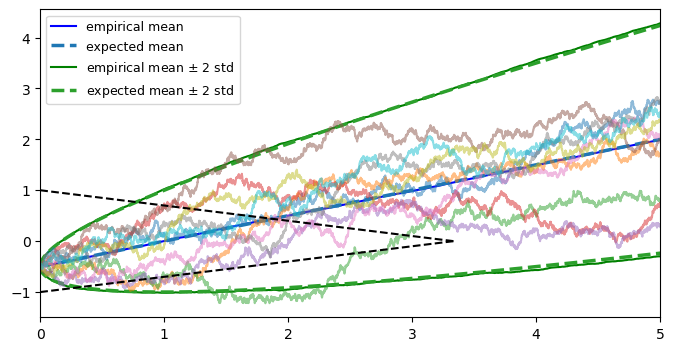

In [2]:
mu = 0.5
sigma = 0.5
x0 = -0.5
num = 2000

a = 1
b = 0.3
T = 5
ddm = SingleStageModel(mu=mu, sigma=sigma, a=a, b=b, x0=x0)
t_grid, X_grids = ddm.simulate_trajs(T=T, Nt=1000 * T, num=num)



expected_mean = x0 + mu * t_grid
empirical_mean = np.mean(X_grids, axis=0)
expected_std = sigma * np.sqrt(t_grid)
empirical_std = np.std(X_grids, axis=0)


fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(t_grid, empirical_mean, label="empirical mean", c="b")
ax.plot(t_grid, expected_mean, label="expected mean", linewidth=2.5, linestyle="--", c="tab:blue")
ax.plot(t_grid, empirical_mean + 2 * empirical_std, label=r"empirical mean $\pm$ 2 std", c="g")
ax.plot(t_grid, empirical_mean - 2 * empirical_std, c="g")
ax.plot(t_grid, expected_mean + 2 * expected_std, label=r"expected mean $\pm$ 2 std", linewidth=2.5, linestyle="--", c="tab:green")
ax.plot(t_grid, expected_mean - 2 * expected_std, linewidth=2.5, linestyle="--", c="tab:green")
ax.plot(t_grid, X_grids[:10, :].T, alpha=0.5)
ax.plot(t_grid[t_grid < a / b], ddm.upper_bdy(t_grid[t_grid < a / b]), c='k', linestyle="--")
ax.plot(t_grid[t_grid < a / b], ddm.lower_bdy(t_grid[t_grid < a / b]), c='k', linestyle="--")
ax.autoscale(axis="x", tight=True)
ax.legend(fontsize=9)
plt.show()


#### 0.2 Simulate first passage times, compute FPTDs and NPDs

##### 0.2.1 For a small $T$, plot both FPTDs and NPD

In [3]:
T = 1
num_fpt = 100000

fp_times, np_poss = ddm.simulate_fptd_tillT(T=T, dt=0.001, num=num_fpt)
counts_t, bins_t = np.histogram(fp_times, bins=100)
dt_bin = bins_t[1] - bins_t[0]
counts_x, bins_x = np.histogram(np_poss, bins=50)
dx_bin = bins_x[1] - bins_x[0]


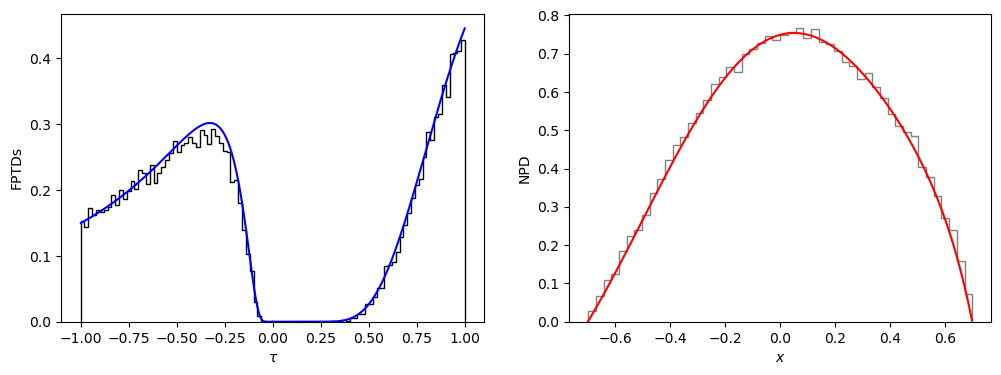

In [4]:

ts = np.arange(1e-3, T, 1e-3)
upper_fptds = fptd_single(ts, mu=mu, sigma=sigma, a1=a, b1=-b, a2=-a, b2=b, x0=x0, bdy=1)
lower_fptds = fptd_single(ts, mu=mu, sigma=sigma, a1=a, b1=-b, a2=-a, b2=b, x0=x0, bdy=-1)

xs = np.arange(ddm.lower_bdy(T), ddm.upper_bdy(T), 1e-3)
npd = q_single(xs, mu=mu, sigma=sigma, a1=a, b1=-b, a2=-a, b2=b, T=T, x0=x0)


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].stairs(counts_t / num_fpt / dt_bin, bins_t, color="black")
ax[0].plot(ts, upper_fptds, c='b')
ax[0].plot(-ts, lower_fptds, c='b')
ax[0].set_xlabel(r"$\tau$")
ax[0].set_ylabel("FPTDs")

ax[1].stairs(counts_x / num_fpt / dx_bin, bins_x, color="gray")
ax[1].plot(xs, npd, c='r')
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel("NPD")

plt.show()

##### 0.2.2 For a large $T$, plot the whole FPTDs

In [5]:
T = a / b - 1e-3
num_fpt = 100000

fp_times, np_poss = ddm.simulate_fptd_tillT(T=T, dt=0.001, num=num_fpt)
counts_t, bins_t = np.histogram(fp_times, bins=100)
dt_bin = bins_t[1] - bins_t[0]

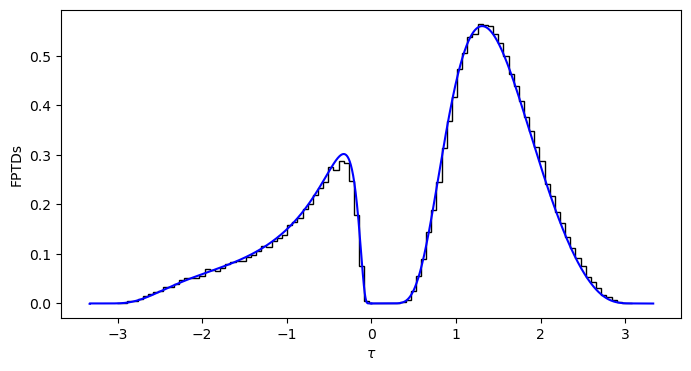

In [6]:

ts = np.arange(1e-3, T, 1e-3)
upper_fptds = fptd_single(ts, mu=mu, sigma=sigma, a1=a, b1=-b, a2=-a, b2=b, x0=x0, bdy=1)
lower_fptds = fptd_single(ts, mu=mu, sigma=sigma, a1=a, b1=-b, a2=-a, b2=b, x0=x0, bdy=-1)


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.stairs(counts_t / num_fpt / dt_bin, bins_t, color="black")
ax.plot(ts, upper_fptds, c='b')
ax.plot(-ts, lower_fptds, c='b')
ax.set_xlabel(r"$\tau$")
ax.set_ylabel("FPTDs")

plt.show()